In [377]:
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

In [378]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
import io

Mounted at /content/gdrive


In [379]:
df = pd.read_csv('/content/gdrive/MyDrive/train_new.csv')

In [380]:
df.head()

,Deal_title,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Lead_revenue,Fund_category,Geography,Location,Designation,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating,Success_probability
0,TitleM5DZY,Restaurants,320506.0,2.067264e+06,2020-03-29,Product_2,50 - 100 Million,Category 2,USA,TX,Executive Vice President,Community pharmacist,Website,Level 3,No track,"Davis,Sharrice A",No,3,73.6
1,TitleKIW18,Construction Services,39488.0,2.408768e+05,2019-07-10,Product_2,500 Million - 1 Billion,Category 4,India,am,Chairman/CEO/President,Recruitment consultant,Others,Level 1,Did not hear back after Level 1,"Brown,Maxine A",No,5,58.9
2,TitleFXSDN,Hospitals/Clinics,359392.0,2.407926e+06,2019-07-27,Product_1,500 Million - 1 Billion,Category 4,USA,NY,SVP/General Counsel,Health service manager,Marketing Event,Level 1,NaN,"Georgakopoulos,Vasilios T",No,4,68.8
3,TitlePSK4Y,Real Estate,76774.0,4.683214e+05,2021-01-30,Product_2,500 Million - 1 Billion,Category 3,USA,WA,CEO/Co-Founder/Chairman,"Therapist, speech and language",Contact Email,Level 2,Did not hear back after Level 1,"Brown,Maxine A",We have all the requirements,1,64.5
4,Title904GV,Financial Services,483896.0,1.569884e+06,2019-05-22,Product_2,50 - 100 Million,Category 3,India,ga,Executive Vice President,Media planner,Website,Level 2,Up-to-date,"Thomas,Lori E",No,4,62.4


In [381]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
lab_encod= LabelEncoder()

In [382]:
USA = pd.DataFrame()

In [383]:
df_USA=df[df["Geography"] == "USA"]
df_India=df[df["Geography"] == "India"]

In [384]:
df_USA=df_USA.drop(["Geography","Date_of_creation"], axis=1)
df_India=df_India.drop(["Geography","Date_of_creation"], axis=1)

In [385]:
df_USA["Industry"]= lab_encod.fit_transform(df_USA["Industry"])
USA_Indus=lab_encod.inverse_transform(df_USA["Industry"])

In [386]:
df_USA["Pitch"]= lab_encod.fit_transform(df_USA["Pitch"])
USA_Pitch=lab_encod.inverse_transform(df_USA["Pitch"])

In [387]:
df_USA["Lead_revenue"]= lab_encod.fit_transform(df_USA["Lead_revenue"])
USA_Lead_revenue=lab_encod.inverse_transform(df_USA["Lead_revenue"])
df_USA["Fund_category"]= lab_encod.fit_transform(df_USA["Fund_category"])
USA_Fund_category=lab_encod.inverse_transform(df_USA["Fund_category"])
df_USA["Designation"]= lab_encod.fit_transform(df_USA["Designation"])
USA_Designation=lab_encod.inverse_transform(df_USA["Designation"])
df_USA["Hiring_candidate_role"]= lab_encod.fit_transform(df_USA["Hiring_candidate_role"])
USA_Hiring_candidate_role=lab_encod.inverse_transform(df_USA["Hiring_candidate_role"])
df_USA["Lead_source"]= lab_encod.fit_transform(df_USA["Lead_source"])
USA_Lead_source=lab_encod.inverse_transform(df_USA["Lead_source"])
df_USA["Level_of_meeting"]= lab_encod.fit_transform(df_USA["Level_of_meeting"])
USA_Level_of_meeting=lab_encod.inverse_transform(df_USA["Level_of_meeting"])
df_USA["Location"]= lab_encod.fit_transform(df_USA["Location"])
USA_Location=lab_encod.inverse_transform(df_USA["Location"])
df_USA["Internal_POC"]= lab_encod.fit_transform(df_USA["Internal_POC"])
USA_POC=lab_encod.inverse_transform(df_USA["Internal_POC"])
df_USA["Resource"]= lab_encod.fit_transform(df_USA["Resource"])
USA_Resource=lab_encod.inverse_transform(df_USA["Resource"])

In [388]:
df_USA["Last_lead_update"] = df_USA["Last_lead_update"].replace("?","Unknown")
df_USA["Last_lead_update"]= lab_encod.fit_transform(df_USA["Last_lead_update"])
USA_Last_lead_update=lab_encod.inverse_transform(df_USA["Last_lead_update"])

In [389]:
df_USA=df_USA. set_index ('Deal_title')

In [390]:
df_USA.head()

,Industry,Deal_value,Weighted_amount,Pitch,Lead_revenue,Fund_category,Location,Designation,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating,Success_probability
Deal_title,,,,,,,,,,,,,,,,
TitleM5DZY,109,320506.0,2067263.7,1,1,1,41,7,125,3,2,6,12,2,3,73.6
TitleFXSDN,52,359392.0,2407926.4,0,2,3,33,8,284,1,0,10,18,2,4,68.8
TitlePSK4Y,105,76774.0,468321.4,1,2,2,45,2,607,0,1,2,5,4,1,64.5
TitleOZQRY,16,384356.0,2709709.8,1,2,0,7,2,80,0,2,4,4,2,4,73.4
TitleV05WV,8,245205.0,1642873.5,1,2,0,8,9,210,2,1,1,8,2,5,74.1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

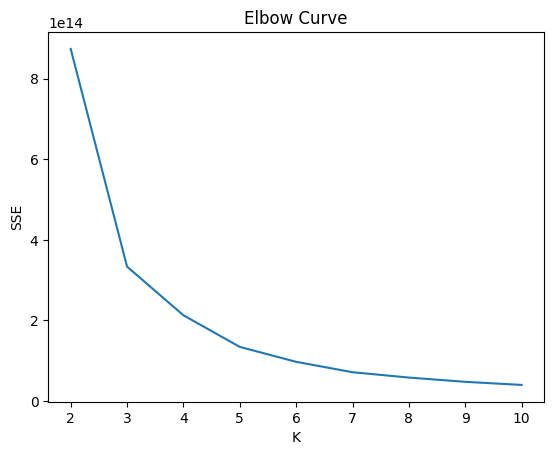

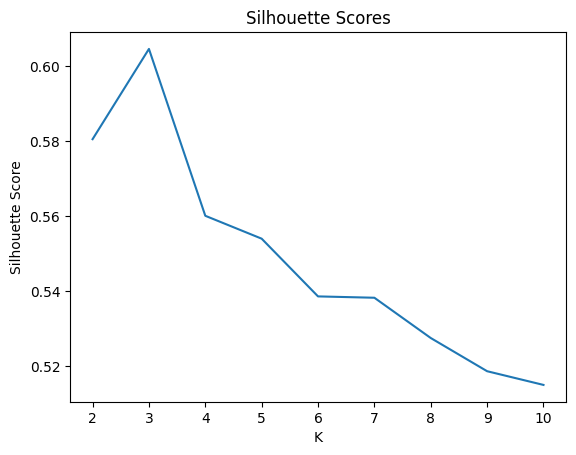

Best K value using elbow method: 3
Best K value using silhouette index: 3
Final best K value: 3


In [391]:
SSE = []
silhouette_scores = []

# try K values from 2 to 10
for k in range(2, 11):
    # initialize the KMeans algorithm
    kmeans = KMeans(n_clusters=k, random_state=42)
    # fit the algorithm on the data
    kmeans.fit(df_USA)
    # add the SSE to the list
    SSE.append(kmeans.inertia_)
    # calculate the silhouette score and add it to the list
    silhouette_scores.append(silhouette_score(df_USA, kmeans.labels_))

# plot the elbow curve
plt.plot(range(2, 11), SSE)
plt.title('Elbow Curve')
plt.xlabel('K')
plt.ylabel('SSE')
plt.show()

# plot the silhouette scores
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Scores')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()
# choose the best K value using the elbow method
best_K_elbow = 3  # the elbow point is at K=3

# choose the best K value using the silhouette index
best_K_silhouette = np.argmax(silhouette_scores) + 2  # add 2 because K range started from 2

# print the best K values from both methods
print("Best K value using elbow method:", best_K_elbow)
print("Best K value using silhouette index:", best_K_silhouette)

# if the best K values are different, choose the one with higher silhouette score
if best_K_elbow != best_K_silhouette:
    if silhouette_scores[best_K_silhouette - 2] > silhouette_scores[best_K_elbow - 2]:
        best_K = best_K_silhouette
    else:
        best_K = best_K_elbow
else:
    best_K = best_K_elbow

# print the final best K value
print("Final best K value:", best_K)

In [392]:
kmeans1=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans1=kmeans1.fit_predict(df_USA)
y_kmeans1

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 2, 0, ..., 1, 0, 1], dtype=int32)

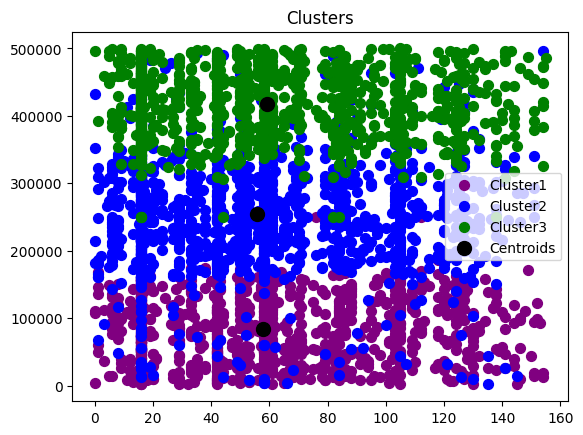

In [393]:
X = np.array(df_USA)
plt.scatter(X[y_kmeans1==0,0],X[y_kmeans1==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X[y_kmeans1==1,0],X[y_kmeans1==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_kmeans1==2,0],X[y_kmeans1==2,1],s=50, c='green',label='Cluster3')
plt.scatter(kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.title('Clusters')
plt.legend()
plt.show()

In [394]:
df_USA['Industry']=USA_Indus
df_USA['Pitch']=USA_Pitch
df_USA["Lead_revenue"]= USA_Lead_revenue
df_USA["Fund_category"]= USA_Fund_category
df_USA["Designation"]= USA_Designation
df_USA["Hiring_candidate_role"]= USA_Hiring_candidate_role
df_USA["Lead_source"]= USA_Lead_source
df_USA["Level_of_meeting"]= USA_Level_of_meeting
df_USA["Location"]= USA_Location
df_USA["Internal_POC"]= USA_POC
df_USA["Resource"]= USA_Resource
df_USA["Last_lead_update"]=USA_Last_lead_update

In [395]:
df_USA.head()

,Industry,Deal_value,Weighted_amount,Pitch,Lead_revenue,Fund_category,Location,Designation,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating,Success_probability
Deal_title,,,,,,,,,,,,,,,,
TitleM5DZY,Restaurants,320506.0,2067263.7,Product_2,50 - 100 Million,Category 2,TX,Executive Vice President,Community pharmacist,Website,Level 3,No track,"Davis,Sharrice A",No,3,73.6
TitleFXSDN,Hospitals/Clinics,359392.0,2407926.4,Product_1,500 Million - 1 Billion,Category 4,NY,SVP/General Counsel,Health service manager,Marketing Event,Level 1,NaN,"Georgakopoulos,Vasilios T",No,4,68.8
TitlePSK4Y,Real Estate,76774.0,468321.4,Product_2,500 Million - 1 Billion,Category 3,WA,CEO/Co-Founder/Chairman,"Therapist, speech and language",Contact Email,Level 2,Did not hear back after Level 1,"Brown,Maxine A",We have all the requirements,1,64.5
TitleOZQRY,Banks,384356.0,2709709.8,Product_2,500 Million - 1 Billion,Category 1,DE,CEO/Co-Founder/Chairman,Cartographer,Contact Email,Level 3,More than 2 weeks,"Booker,David L",No,4,73.4
TitleV05WV,Architecture/Engineering,245205.0,1642873.5,Product_2,500 Million - 1 Billion,Category 1,FL,Vice President / GM (04-present) : VP Sales an...,"Engineer, maintenance (IT)",Others,Level 2,5 days back,"Cashin,Marc C",No,5,74.1


In [396]:
df_clusters = {}
for cluster_id in range(3):
    df_clusters[cluster_id] = df_USA[y_kmeans1 == cluster_id]

In [397]:
num_datapoints_in_cluster = {}
for cluster_id in range(3):
    num_datapoints_in_cluster[cluster_id] = len(df_USA[y_kmeans1 == cluster_id])
for cluster_id, num_datapoints in num_datapoints_in_cluster.items():
    print(f"Cluster {cluster_id}: {num_datapoints}")

Cluster 0: 1058
Cluster 1: 1384
Cluster 2: 1061


In [398]:
for cluster_id, df in df_clusters.items():
    df.to_csv(f"/content/gdrive/MyDrive/USA_{cluster_id}.csv")

For India now

In [399]:
df_India["Industry"]= lab_encod.fit_transform(df_India["Industry"])
India_Indus=lab_encod.inverse_transform(df_India["Industry"])
df_India["Pitch"]= lab_encod.fit_transform(df_India["Pitch"])
India_Pitch=lab_encod.inverse_transform(df_India["Pitch"])

In [400]:
df_India["Lead_revenue"]= lab_encod.fit_transform(df_India["Lead_revenue"])
India_Lead_revenue=lab_encod.inverse_transform(df_India["Lead_revenue"])
df_India["Fund_category"]= lab_encod.fit_transform(df_India["Fund_category"])
India_Fund_category=lab_encod.inverse_transform(df_India["Fund_category"])
df_India["Designation"]= lab_encod.fit_transform(df_India["Designation"])
India_Designation=lab_encod.inverse_transform(df_India["Designation"])
df_India["Hiring_candidate_role"]= lab_encod.fit_transform(df_India["Hiring_candidate_role"])
India_Hiring_candidate_role=lab_encod.inverse_transform(df_India["Hiring_candidate_role"])
df_India["Lead_source"]= lab_encod.fit_transform(df_India["Lead_source"])
India_Lead_source=lab_encod.inverse_transform(df_India["Lead_source"])
df_India["Level_of_meeting"]= lab_encod.fit_transform(df_India["Level_of_meeting"])
India_Level_of_meeting=lab_encod.inverse_transform(df_India["Level_of_meeting"])
df_India["Location"]= lab_encod.fit_transform(df_India["Location"])
India_Location=lab_encod.inverse_transform(df_India["Location"])
df_India["Internal_POC"]= lab_encod.fit_transform(df_India["Internal_POC"])
India_POC=lab_encod.inverse_transform(df_India["Internal_POC"])
df_India["Resource"]= lab_encod.fit_transform(df_India["Resource"])
India_Resource=lab_encod.inverse_transform(df_India["Resource"])

In [401]:
df_India["Last_lead_update"] = df_India["Last_lead_update"].replace("?","Unknown")
df_India["Last_lead_update"]= lab_encod.fit_transform(df_India["Last_lead_update"])
India_Last_lead_update=lab_encod.inverse_transform(df_India["Last_lead_update"])

In [402]:
df_India.head()

,Deal_title,Industry,Deal_value,Weighted_amount,Pitch,Lead_revenue,Fund_category,Location,Designation,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating,Success_probability
1,TitleKIW18,28,39488.0,2.408768e+05,1,2,3,7,4,500,2,0,2,5,2,5,58.90
4,Title904GV,42,483896.0,1.569884e+06,1,1,2,22,7,368,3,1,8,53,2,4,62.40
5,Title00VOR,14,418674.0,2.637646e+06,0,1,1,26,2,380,1,2,0,16,1,3,66.30
13,TitleNQKU6,14,487351.0,1.569884e+06,0,2,2,33,5,299,1,2,5,50,4,2,26.35
14,TitleZMS0G,124,88552.0,5.623052e+05,1,0,3,17,1,481,3,0,7,59,4,3,60.70


In [403]:
df_India=df_India. set_index ('Deal_title')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

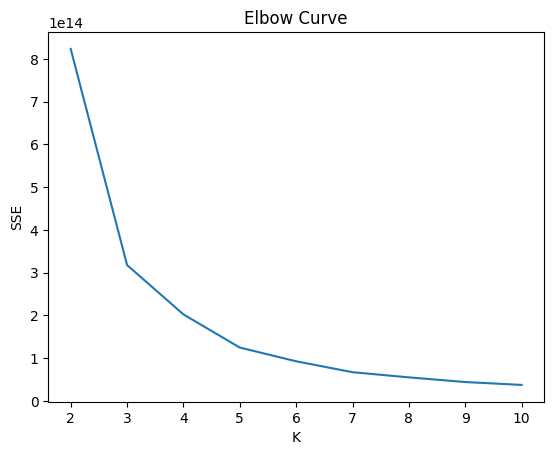

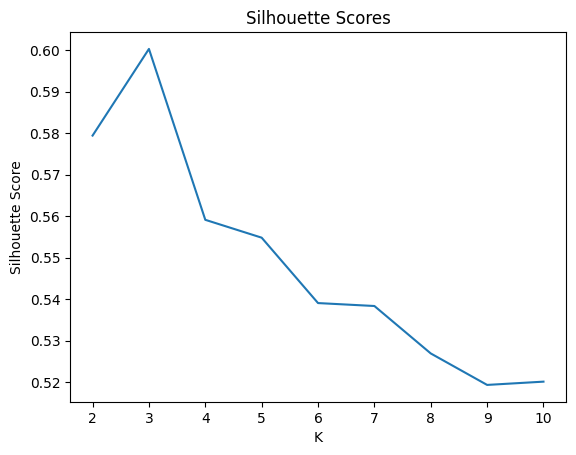

Best K value using elbow method: 3
Best K value using silhouette index: 3
Final best K value: 3


In [404]:
SSE = []
silhouette_scores = []

# try K values from 2 to 10
for k in range(2, 11):
    # initialize the KMeans algorithm
    kmeans = KMeans(n_clusters=k, random_state=42)
    # fit the algorithm on the data
    kmeans.fit(df_India)
    # add the SSE to the list
    SSE.append(kmeans.inertia_)
    # calculate the silhouette score and add it to the list
    silhouette_scores.append(silhouette_score(df_India, kmeans.labels_))

# plot the elbow curve
plt.plot(range(2, 11), SSE)
plt.title('Elbow Curve')
plt.xlabel('K')
plt.ylabel('SSE')
plt.show()

# plot the silhouette scores
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Scores')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()
# choose the best K value using the elbow method
best_K_elbow = 3  # the elbow point is at K=3

# choose the best K value using the silhouette index
best_K_silhouette = np.argmax(silhouette_scores) + 2  # add 2 because K range started from 2

# print the best K values from both methods
print("Best K value using elbow method:", best_K_elbow)
print("Best K value using silhouette index:", best_K_silhouette)

# if the best K values are different, choose the one with higher silhouette score
if best_K_elbow != best_K_silhouette:
    if silhouette_scores[best_K_silhouette - 2] > silhouette_scores[best_K_elbow - 2]:
        best_K = best_K_silhouette
    else:
        best_K = best_K_elbow
else:
    best_K = best_K_elbow

# print the final best K value
print("Final best K value:", best_K)

In [405]:
kmeans2=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans2=kmeans2.fit_predict(df_India)
y_kmeans2

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 2, 0, ..., 0, 2, 2], dtype=int32)

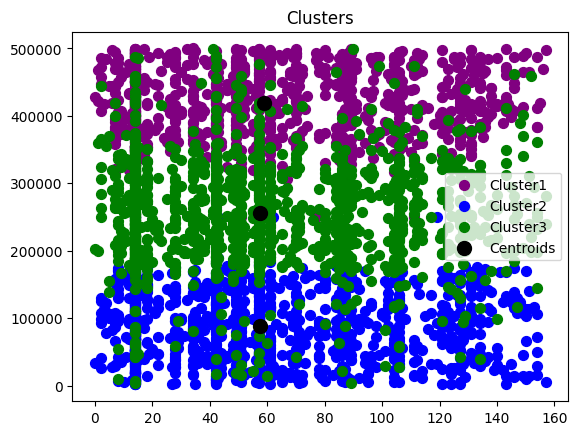

In [406]:
X2 = np.array(df_India)
plt.scatter(X2[y_kmeans2==0,0],X2[y_kmeans2==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X2[y_kmeans2==1,0],X2[y_kmeans2==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X2[y_kmeans2==2,0],X2[y_kmeans2==2,1],s=50, c='green',label='Cluster3')
plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.title('Clusters')
plt.legend()
plt.show()

In [407]:
df_India['Industry']=India_Indus
df_India['Pitch']=India_Pitch
df_India["Lead_revenue"]= India_Lead_revenue
df_India["Fund_category"]= India_Fund_category
df_India["Designation"]= India_Designation
df_India["Hiring_candidate_role"]= India_Hiring_candidate_role
df_India["Lead_source"]= India_Lead_source
df_India["Level_of_meeting"]= India_Level_of_meeting
df_India["Location"]= India_Location
df_India["Internal_POC"]= India_POC
df_India["Resource"]= India_Resource
df_India["Last_lead_update"]=India_Last_lead_update

In [408]:
df_India.head()

,Industry,Deal_value,Weighted_amount,Pitch,Lead_revenue,Fund_category,Location,Designation,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating,Success_probability
Deal_title,,,,,,,,,,,,,,,,
TitleKIW18,Construction Services,39488.0,2.408768e+05,Product_2,500 Million - 1 Billion,Category 4,am,Chairman/CEO/President,Recruitment consultant,Others,Level 1,Did not hear back after Level 1,"Brown,Maxine A",No,5,58.90
Title904GV,Financial Services,483896.0,1.569884e+06,Product_2,50 - 100 Million,Category 3,ga,Executive Vice President,Media planner,Website,Level 2,Up-to-date,"Thomas,Lori E",No,4,62.40
Title00VOR,Banks,418674.0,2.637646e+06,Product_1,50 - 100 Million,Category 2,hr,CEO/Co-Founder/Chairman,Microbiologist,Marketing Event,Level 3,2 days back,"Featherstone,Adrian R",Deliverable,3,66.30
TitleNQKU6,Banks,487351.0,1.569884e+06,Product_1,500 Million - 1 Billion,Category 3,it,Chairman/Chief Innovation Officer,Hospital doctor,Marketing Event,Level 3,More than a week back,"Shelton,Sidney P",We have all the requirements,2,26.35
TitleZMS0G,Services,88552.0,5.623052e+05,Product_2,100 - 500 Million,Category 4,ed,CEO/Chairman/President,Public affairs consultant,Website,Level 1,Pending,"Young,Valerie K",We have all the requirements,3,60.70


In [409]:
df_clusters2 = {}
for cluster_id in range(3):
    df_clusters2[cluster_id] = df_India[y_kmeans2 == cluster_id]

In [410]:
num_datapoints_in_cluster2 = {}
for cluster_id in range(3):
    num_datapoints_in_cluster2[cluster_id] = len(df_India[y_kmeans2 == cluster_id])
for cluster_id, num_datapoints in num_datapoints_in_cluster2.items():
    print(f"Cluster {cluster_id}: {num_datapoints}")

Cluster 0: 1010
Cluster 1: 1164
Cluster 2: 1330


In [411]:
for cluster_id, df in df_clusters2.items():
    df.to_csv(f"/content/gdrive/MyDrive/India_{cluster_id}.csv")